<a href="https://colab.research.google.com/github/beergil/case-studies/blob/main/artificial_neural_network_regression_combined_cycle_power_plant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing libraries

In [15]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt



In [2]:
tf.__version__

'2.13.0'

# Part 1 - Data Preprocessing


In [3]:
dataset = pd.read_excel('Folds5x2_pp.xlsx')
X = dataset.iloc[:, : -1].values
y = dataset.iloc[:,-1].values


## Importing the dataset

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Splitting the dataset into Training set and Test set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, t_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Part 2 - Building the ANN

## Initializing the ANN

In [6]:
ann = tf.keras.models.Sequential()

## Adding the input layer and the first hidden layer

In [7]:
ann.add(tf.keras.layers.Dense(units = 6, activation= 'relu' ))

## Adding the second hidden layer

In [8]:
ann.add(tf.keras.layers.Dense(units = 6, activation= 'relu' ))

## Adding the output layer

In [9]:
ann.add(tf.keras.layers.Dense(units = 1)) # no activation function for regression analysis

# Part 3 - Training the ANN

## Compiling the ANN

In [10]:
ann.compile(optimizer = 'adam', loss = 'mse', metrics = 'mse')

## Training the ANN model on the Training set

In [11]:
# Fit the model
history = ann.fit(X_train, y_train, batch_size = 32, epochs= 100)

Epoch 1/100
240/240 [==============================] - 3s 3ms/step - loss: 90726.3281 - mse: 90726.3281
Epoch 2/100
240/240 [==============================] - 1s 3ms/step - loss: 162.7496 - mse: 162.7496
Epoch 3/100
240/240 [==============================] - 1s 5ms/step - loss: 158.9919 - mse: 158.9919
Epoch 4/100
240/240 [==============================] - 1s 4ms/step - loss: 155.2928 - mse: 155.2928
Epoch 5/100
240/240 [==============================] - 1s 4ms/step - loss: 150.3540 - mse: 150.3540
Epoch 6/100
240/240 [==============================] - 1s 3ms/step - loss: 144.9677 - mse: 144.9677
Epoch 7/100
240/240 [==============================] - 1s 4ms/step - loss: 139.5339 - mse: 139.5339
Epoch 8/100
240/240 [==============================] - 1s 2ms/step - loss: 133.7874 - mse: 133.7874
Epoch 9/100
240/240 [==============================] - 1s 4ms/step - loss: 127.8530 - mse: 127.8530
Epoch 10/100
240/240 [==============================] - 1s 3ms/step - loss: 122.2548 - mse: 122.

## Model Evaluation

In [12]:
ann.evaluate(X_test, y_test)

60/60 [==============================] - 0s 1ms/step - loss: 25.7217 - mse: 25.7217


[25.72169303894043, 25.72169303894043]

## Plotting the loss curve or training curve

Text(0.5, 0, 'epochs')

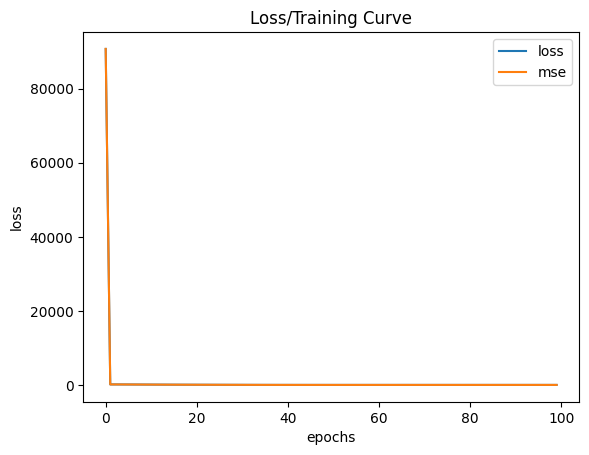

In [20]:
pd.DataFrame(history.history).plot()
plt.title("Loss/Training Curve")
plt.ylabel("loss")
plt.xlabel("epochs")

## Predicting the results of the Test set

In [17]:
y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


60/60 [==============================] - 0s 1ms/step
[[430.2  431.23]
 [461.26 460.01]
 [464.78 461.14]
 ...
 [472.02 473.26]
 [438.76 438.  ]
 [458.01 463.28]]


In [19]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 30        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 79 (316.00 Byte)
Trainable params: 79 (316.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
